In [2]:
#getting the dataset

import urllib.request
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'
filename = 'loan_train.csv'
urllib.request.urlretrieve(url, filename)

('loan_train.csv', <http.client.HTTPMessage at 0x7fec3014b850>)

In [3]:
#making the pandas file

import pandas as pd
loan_df_main = pd.read_csv('loan_train.csv') #this is the main copy of the dataframe
loan_df_main.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
loan_df = loan_df_main.copy()
#Data Preparation: Setting the date to pandas datetime()
loan_df['effective_date'] = pd.to_datetime(loan_df['effective_date'])
loan_df['due_date'] = pd.to_datetime(loan_df['due_date'])

In [5]:
import numpy as np
import matplotlib.pyplot as plt

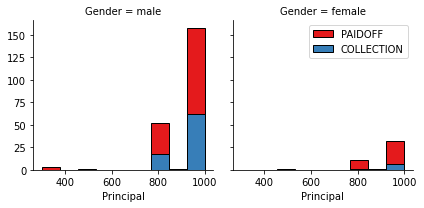

In [6]:
#initial data visualisation, the gender-based loan repayments based on principal
import seaborn as sns
bins = np.linspace(loan_df['Principal'].min(), loan_df['Principal'].max(),10)
graph = sns.FacetGrid(loan_df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
graph.map(plt.hist,'Principal',bins=bins,ec='k')

graph.axes[-1].legend()
plt.show()

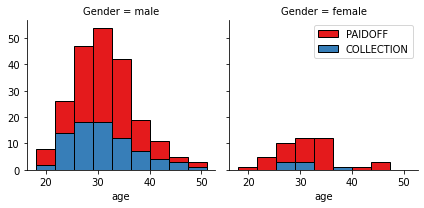

In [7]:
#initial data visualisation, the gender-based loan repayments based on age
import seaborn as sns
bins = np.linspace(loan_df['age'].min(), loan_df['age'].max(),10)
graph = sns.FacetGrid(loan_df,col='Gender',hue='loan_status',palette='Set1',col_wrap=2)
graph.map(plt.hist,'age',bins=bins,ec='k')

graph.axes[-1].legend()
plt.show()

In [8]:
loan_df.groupby('Gender')['loan_status'].value_counts(normalize=True) #86% females and 73% males have paid their loans

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

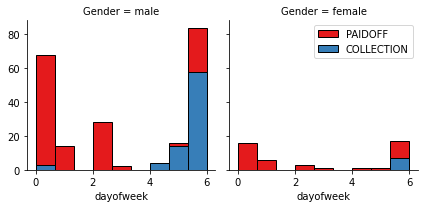

In [9]:
#data visualisation to see the day of the week people get the loan
loan_df['dayofweek'] = loan_df['effective_date'].dt.dayofweek
bins = np.linspace(loan_df.dayofweek.min(), loan_df.dayofweek.max(), 10)
graph = sns.FacetGrid(loan_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
graph.map(plt.hist, 'dayofweek', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()
#we observe the weekend to be a significant contributor to loan disbursement

In [10]:
#Data preparation, to set a binary variable to the weekend
loan_df['weekend'] = loan_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
loan_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [11]:
#correcting the spelling of Bachelors
loan_df['education'].replace(to_replace='Bechalor', value='Bachelors', inplace=True)

In [12]:
#Data Preparation: Set the gender column to binary
loan_df['Gender'].replace(to_replace = ['male','female'],value=[1,0],inplace=True)
loan_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bachelors,0,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1


In [13]:
#Data visualisation based on education
loan_df.groupby('education')['loan_status'].value_counts(normalize=True)

education             loan_status
Bachelors             PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [14]:
#Features before one hot encoding 
x_list = ['Principal','terms','age','Gender','education','weekend']
print(loan_df[x_list].head())
print(loan_df[x_list].shape)

   Principal  terms  age  Gender             education  weekend
0       1000     30   45       1  High School or Below        0
1       1000     30   33       0             Bachelors        0
2       1000     15   27       1               college        0
3       1000     30   28       0               college        1
4       1000     30   29       1               college        1
(346, 6)


In [15]:
#Transforming the data so that the education levels become columns with binary variables
education_df = pd.get_dummies(loan_df['education'])
education_df = education_df.drop('Master or Above', axis=1)
feature_df = pd.concat([loan_df[x_list],education_df],axis=1).drop('education',axis=1)

In [16]:
x_matrix = feature_df.values #the features matrix is thus prepared

In [17]:
#normalisation of the x_matrix
from sklearn.preprocessing import StandardScaler
x_matrix = StandardScaler().fit(x_matrix).transform(x_matrix)

In [18]:
y_matrix = loan_df['loan_status'].replace(['PAIDOFF','COLLECTION'],[1,0]) 
#converted the loan status to binary because the KNN accuracy was showing 
#error that y_pred is (1,0) but y_test is ('PAIDOFF','COLLECTION')

# Classification Profiles

1. K-Nearest Neighbours - The Supervised Classification Model that uses provided labels to classify other data points.


In [19]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_matrix,y_matrix,test_size=0.3,random_state=4) #this sets binary values to y_matrix

In [20]:
from sklearn.neighbors import KNeighborsClassifier #importing the K-NN classifier model

In [21]:
#The K-Nearest Neighbors algorithm is a classification algorithm that takes a bunch of 
#labeled points and uses them to learn how to label other points. This algorithm 
#classifies cases based on their similarity to other cases. In K-Nearest Neighbors, 
#data points that are near each other are said to be neighbors. K-Nearest Neighbors 
#is based on this paradigm. Similar cases with the same class labels are near each other. 
#Thus, the distance between two cases is a measure of their dissimilarity. 

#initialising the model on the training data, the number of k neighbours is set to 4. 

k_nbrs = 4
kNNModel = KNeighborsClassifier(n_neighbors=k_nbrs).fit(x_train,y_train) #performing the training

y_pred = kNNModel.predict(x_test) #getting the predicted values 


In [22]:
#Developing the accuracy measures of the model with k=4

from sklearn.metrics import jaccard_score, accuracy_score, f1_score

j_score, a_score, f_score = jaccard_score(y_test,y_pred), accuracy_score(y_test,y_pred), f1_score(y_test,y_pred)

In [23]:
print('The Accuracy Measures of the KNN (k=4) model:')
print('Jaccard Score \t', j_score)
print('Accuracy Score \t', a_score)
print('F1 Score \t', f_score)

The Accuracy Measures of the KNN (k=4) model:
Jaccard Score 	 0.6627906976744186
Accuracy Score 	 0.7211538461538461
F1 Score 	 0.7972027972027972


In [24]:
#The confusion matrix figure function, I will use this for all the other classification models
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.74 0.26]
 [0.33 0.67]]


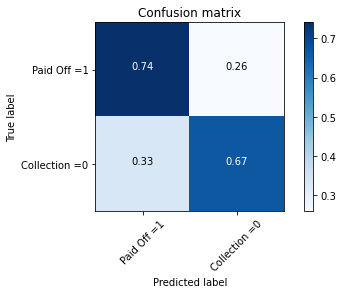

In [25]:
# The confusion Matrix computation
from sklearn.metrics import classification_report, confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Paid Off =1','Collection =0'],normalize= True,  title='Confusion matrix')

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.67      0.55        27
           1       0.86      0.74      0.80        77

    accuracy                           0.72       104
   macro avg       0.67      0.70      0.68       104
weighted avg       0.76      0.72      0.73       104



In [27]:
# PART TO FIND THE OPTIMAL k neighbours FOR THE CLASSIFICATION ##

Ks = 5
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test,y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(yhat.shape[0])

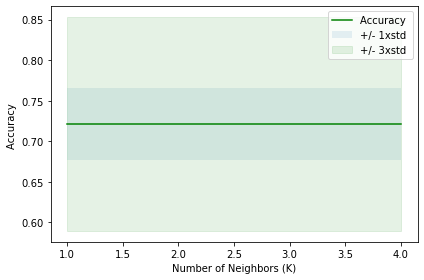

In [28]:
# Plotting to find the optimal accuracy

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [29]:
#The accuracy is near constant across k values. 
#This means that only one neighbour is enough 
#to classify the the data-point as PAIDOFF or COLLECTION. 

#############################################################################################################################

2. DECISION TREE - The algorithm determines the best or  more predictive attribute to split the data at every node.

In [29]:
#Decision makes more sense with non-standardised values
x_matrix_tree = feature_df.values

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_matrix_tree,y_matrix,test_size=0.3,random_state=4)

In [31]:
#Importing the decision tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

loan_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4).fit(x_train,y_train)

#There are two criterion - Entropy (this maximises the information gain at every node) 
#and Gini (this minimises the probability that a feature is incorrectly assigned to a node)
y_pred_tree = loan_tree.predict(x_test)

In [32]:
#Accuracy Evaluation using the metrics we imported before
j_score, a_score, f_score = jaccard_score(y_test,y_pred_tree), accuracy_score(y_test,y_pred_tree), f1_score(y_test,y_pred_tree)

print('The Accuracy Measures of the Decision Tree with max-depth = 4:')
print('Jaccard Score \t', j_score)
print('Accuracy Score \t', a_score)
print('F1 Score \t', f_score)

The Accuracy Measures of the Decision Tree with max-depth = 4:
Jaccard Score 	 0.7403846153846154
Accuracy Score 	 0.7403846153846154
F1 Score 	 0.850828729281768


Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


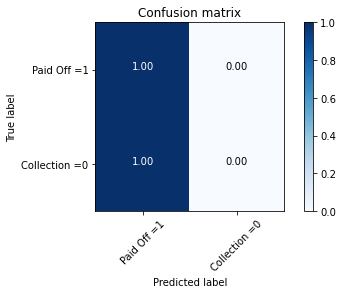

In [33]:
#Confusion matrix
cnf_matrix_tree = confusion_matrix(y_test, y_pred_tree, labels=[1,0])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_tree, classes=['Paid Off =1','Collection =0'],normalize= True,  title='Confusion matrix')

In [36]:
#conda install -c conda-forge pydotplus

In [34]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
import matplotlib.pyplot as plt

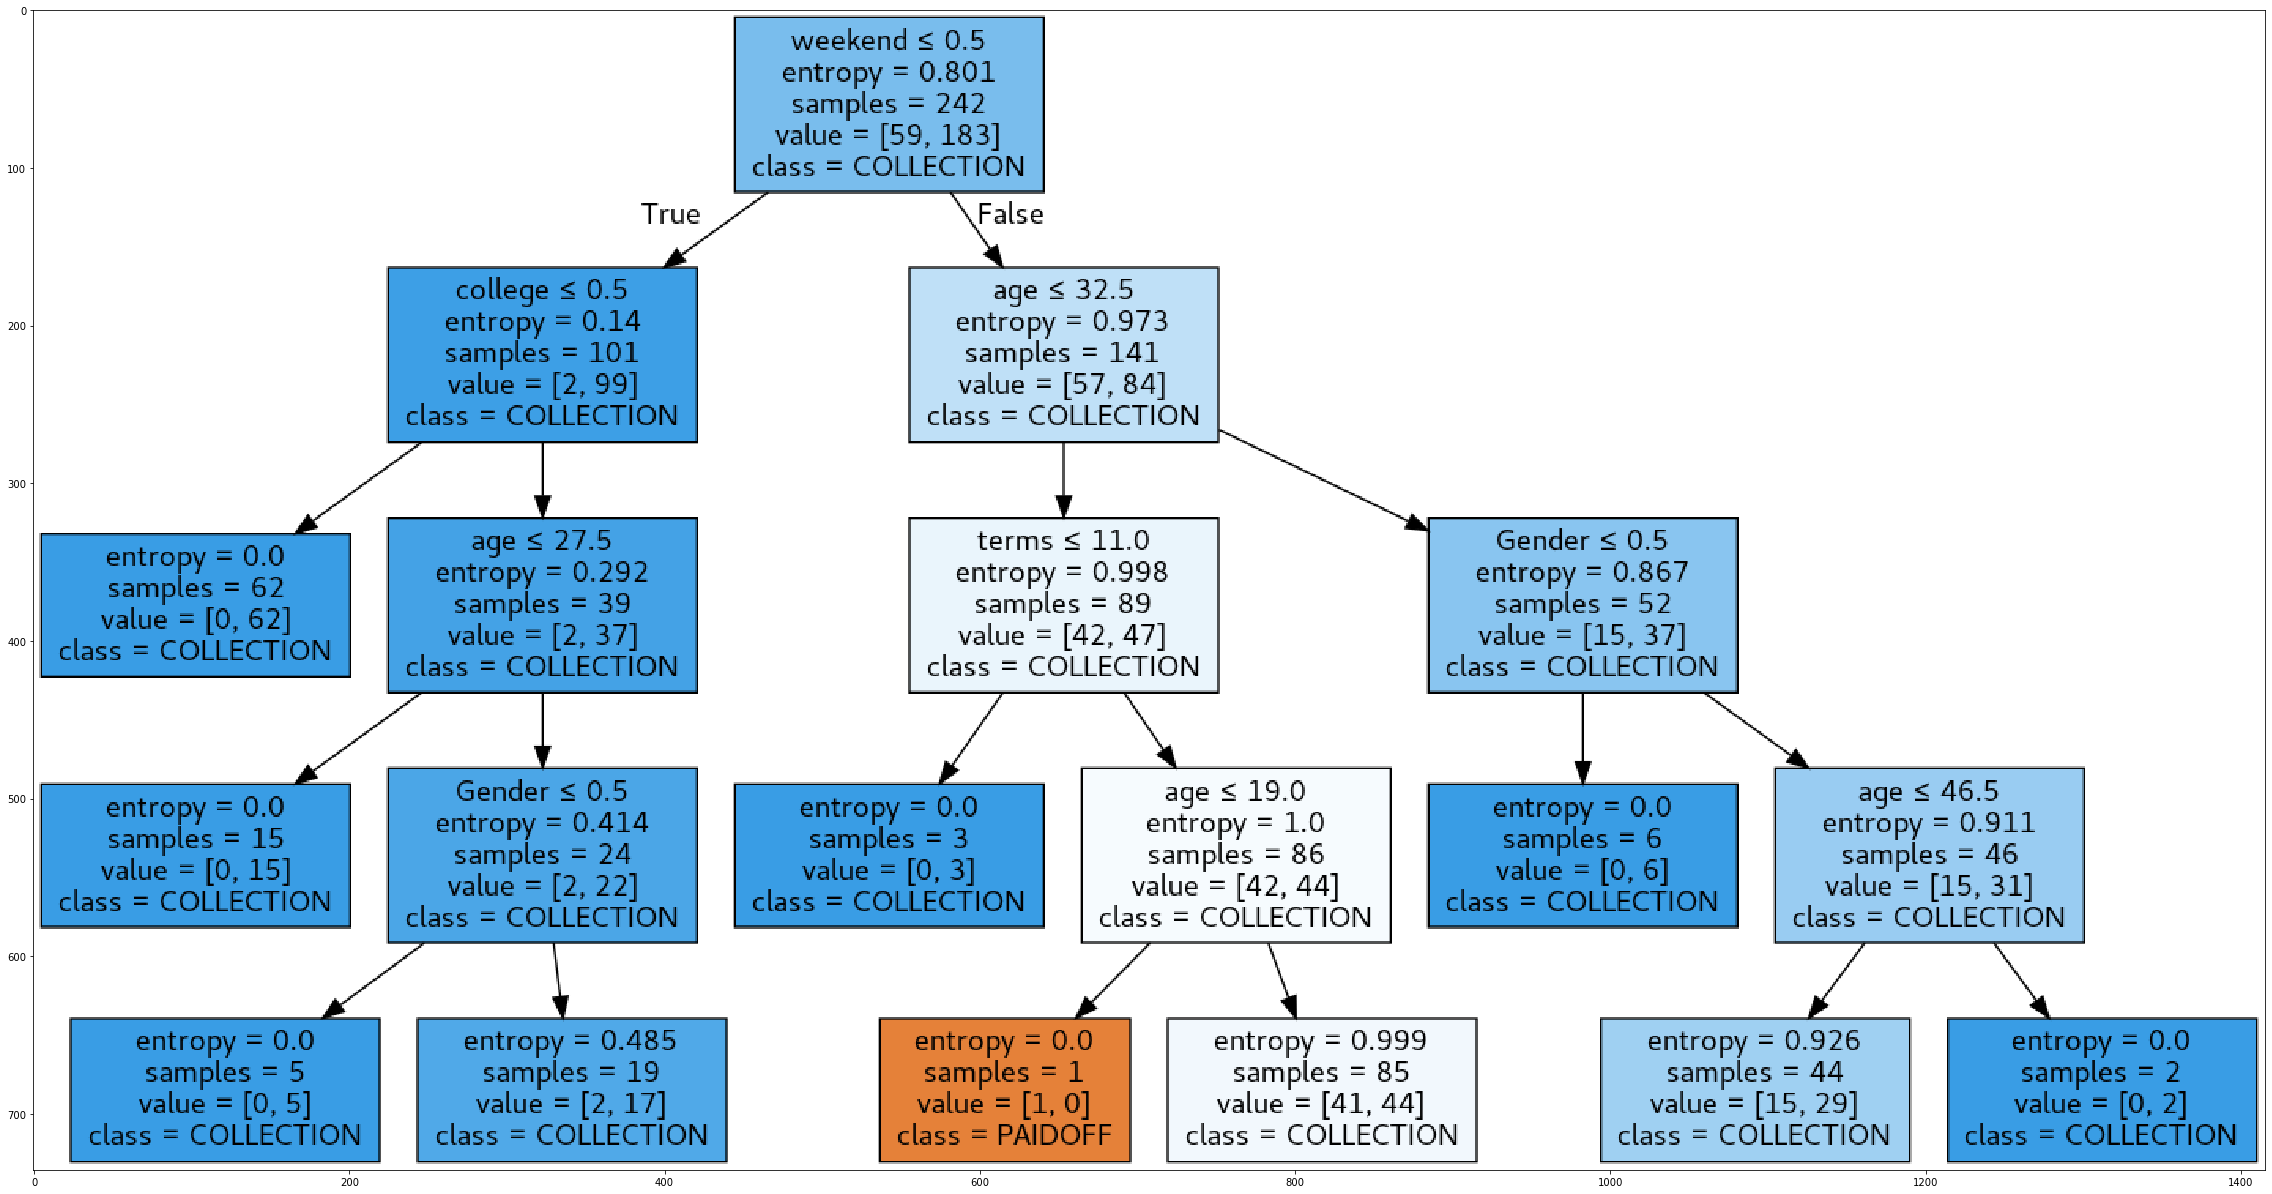

In [35]:
dot_data = StringIO()
filename = "loantree.png"
out=tree.export_graphviz(loan_tree,feature_names=list(feature_df.columns), out_file=dot_data, class_names= ['PAIDOFF','COLLECTION'], filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(40, 75))
plt.imshow(img,interpolation='nearest')

###############################################################################################################################

3. THE SUPPORT VECTOR MACHINES - Supervised learning methods that are applicable even when number of dimensions exceeds number of samples. These are used for classification, regression and detecting outliers.

In [37]:
#we can use the binary features so, the train and test data is same as the one for k-nearest neigbours
#loading, fitting the model and predicting 
from sklearn import svm
loan_svm = svm.SVC(kernel='rbf').fit(x_train,y_train)
y_pred_svm = loan_svm.predict(x_test)

In [38]:
#Making the accuracy measures for model evaluation
j_score, a_score, f_score = jaccard_score(y_test,y_pred_svm), accuracy_score(y_test,y_pred_svm), f1_score(y_test,y_pred_svm)

print('The Accuracy Measures of the SVM SVC with rbf kernel:')
print('Jaccard Score \t', j_score)
print('Accuracy Score \t', a_score)
print('F1 Score \t', f_score)

The Accuracy Measures of the SVM SVC with rbf kernel:
Jaccard Score 	 0.7403846153846154
Accuracy Score 	 0.7403846153846154
F1 Score 	 0.850828729281768


Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


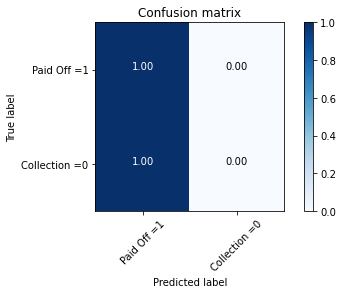

In [39]:
#making the confusion matrix

cnf_matrix_svm = confusion_matrix(y_test, y_pred_svm, labels=[1,0])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_svm, classes=['Paid Off =1','Collection =0'],normalize= True,  title='Confusion matrix')

It seems that SVM predicted all data points as PAIDOFF. The other models do not have this problem. 

##############################################################################################################################

4. Logistic Regression Classification - Based on the sigmoid function,Logistic regression is a statistical and machine learning technique for classifying records of a dataset based on the values of the input fields. The output is a discrete/cateogorical value instead of a numerical one.

In [43]:
#We use the train and test data used for k-nearest neighbour and SVM. Thus, begin with making, fitting and predicting the model.
from sklearn.linear_model import LogisticRegression

loan_logit = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
y_pred_logit = loan_logit.predict_proba(x_test)

In [50]:
#a_score = accuracy_score(y_test,y_pred_logit)

from sklearn.metrics import log_loss

print('The Accuracy Measures of the Logisitc Regression Model:')
print('Log Loss \t', log_loss(y_test,y_pred_logit))


The Accuracy Measures of the Logisitc Regression Model:
Loss Loss 	 0.5770911618382597


Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


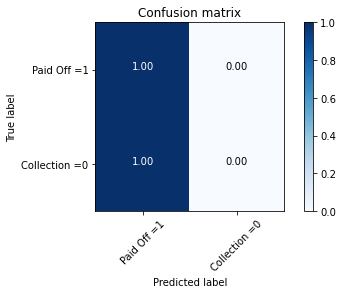

In [42]:
#making the confusion matrix

cnf_matrix_logit = confusion_matrix(y_test, y_pred_logit, labels=[1,0])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_logit, classes=['Paid Off =1','Collection =0'],normalize= True,  title='Confusion matrix')

The Logisitc Regression Model also produces all output as PAIDOFF, thus, both these models have identical accuracies. 

Thus, the data can be best classified by SVM algorithm as it has highest accuracy.